In [11]:
import numpy as np
import cv2 as cv
import math

In [14]:
filename = './images/origin.png'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

In [6]:
if img is None:
    print('err')

In [15]:
dst = cv.Canny(img, 50, 200, None,3)

In [16]:
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

In [17]:
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

In [18]:
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

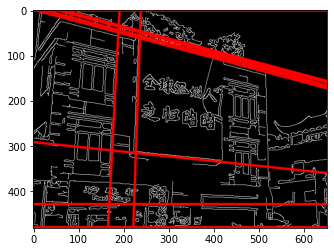

In [19]:
cdst = cv.cvtColor(cdst, cv.COLOR_BGR2RGB)
plt.imshow(cdst)
plt.show()

## Probabilistic Hough Line Transform

In [20]:
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

In [21]:
# Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

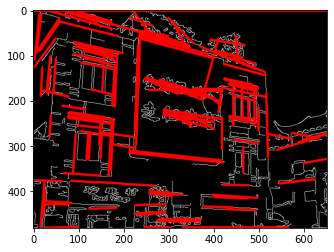

In [23]:
cdstp = cv.cvtColor(cdstP, cv.COLOR_BGR2RGB)
plt.imshow(cdstp)
plt.show()